# TP 2 : fixed point and Newton method

---

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\renewcommand{\epsilon}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$

You will use this notebook to answer the exercises. You can add text (markdown) or code cells as you see fit, but you are not allowed to delete cells.



Type in this cell the number of the team and the names of the participating students:
### BEGIN SOLUTION
### END SOLUTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 : Fixed point search

The author of the original french version for the fixed point exercises of this notebook is Fabien Vergnet (Sorbonne Universite)
 
We wish to calculate an approximate value of a fixed point of a contracting function $g$ from a given point $x_{0}$. We will use the iterative method seen in class, that is to say, consider the iterations
$$
x_{n+1}=g(x_n).
$$

### Question 1
We want to calculate the fixed point with a given precision and we want to define a stopping criterion for this algorithm.

Suppose there exists $n_0\in\N$ such that $|x_{n_0+1}-x_{n_0}| < \epsilon$.
  1. Show that for all $n\geq n_0$, $|x_{n+1}-x_{n}| < k^{n-n_0}\epsilon$, with $k>0$.
  2. Show that for all $n\geq n_0$ and for all $p\geq 1$, $|x_{n+p}-x_n| < k^{n-n_0}\sum_{q=0}^{p-1} k^q \epsilon$.
  3. Then define a stopping criterion for this fixed point algorithm.
     

=== BEGIN RESPONSE ===

1. For $n=n_0$, the inequality is true by hypothesis.
Suppose then that the inequality is true for some $n\geq n_0$.
As $g$ is contracting, there exists a constant $k\in[0,1[$ such that
$$
|x_{n+2} - x_{n-1}| = | g(x_{n+1}) - g(x_n) | \leq k |x_{n+1}-x_n| < k^{n-n_0+1}\epsilon.
$$
By induction this inequality is true for all $n\geq n_0$

2. Let $n\geq n_0$. For $p=1$ the inequality is true according to question 1.
Suppose then that the inequality is true for some $p\geq1$. We then have
$$
|x_{n+p+1}-x_n| \leq |x_{n+p+1} - x_{n+p}| + |x_{n+p}-x_n| < k^p |x_{n+1}-x_n| + k^{n-n_0}\sum_{q=0}^{p-1} k^q < k^{n-n_0}\sum_{q=0}^{p} k^q
$$

3. For all $p\geq1$, $\sum_{q=0}^{p-1} k^q = \frac{1-k^p}{1-k}$.
If we make $p$ tend towards $\infty$ in the previous inequality, we obtain that
$$
|x^* - x_n| < \frac{k^{n-n_0}}{1-k} \epsilon
$$
for all $n\geq n_0$.
We therefore observe that the error at rank $n\geq n_0$ can be greater than the desired $\epsilon$ precision and this depends on the contracting constant of $g$.
If $k\leq \frac12$, then for $n> n_0$, we have $|x^* - x_n| <\epsilon$.
On the other hand, if $k=0.9$ for example, the error is much greater than $\epsilon$. In fact for $k\in]0.1[$, we can determine how many additional iterations would be necessary to obtain an error lower than $\epsilon$. To do this, we set $m=n-n_0$ and look for $m$ such that
$$
\frac{k^m}{1-k} \leq 1
$$
and we find that it is necessary that $m\geq\frac{\ln(1-k)}{\ln(k)}$.
If $k=\frac12$, we find $m\geq1$ and this means that $x_{n_0+1}$ is an approximation of $x^*$ up to $\epsilon$.
If $k=0.9$, we find $m\geq22$ and this means that we would have to do 22 additional iterations to have an approximation of $x^*$ to the nearest $\epsilon$.
For $k=0.99$, we find $m\geq459$...

In practice, we choose a fairly small tolerance $\epsilon$ and we stop when $|x_{n+1}-x_n|\leq \epsilon$.

​
=== END RESPONSE ===

### Question 2
Define the $fixedpoint$ function which takes as argument:
- the initial condition $x_0$,
- the precision $\epsilon$,
- the $g$ function

and which returns:
- a value approximating a fixed point of $g$ and
- the number of iterations necessary to reach the precision $\epsilon$.

In [2]:
def fixedpoint(x0,eps,g):
    ### BEGIN SOLUTION
    x=x0
    n=0
    while np.linalg.norm(x-g(x))>eps:
        x=g(x)
        n=n+1
    return x,n
    ### END SOLUTION


### Question 3
We consider the function $g(x)=2\sin(x)$ on $[-2,2]$. Represent the graph of this function as well as the line $y=x$. 

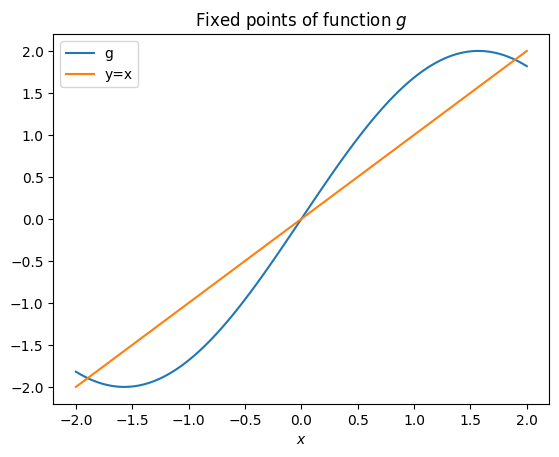

In [3]:
N = 100
X = np.linspace(-2,2,N) 

### BEGIN SOLUTION
G = 2*np.sin(X)

plt.figure(1)
plt.plot(X,G, label='g')
plt.plot(X,X, label='y=x')
plt.legend()
plt.title("Fixed points of function $g$")
plt.xlabel("$x$")
plt.show()
### END SOLUTION

How many a priori fixed points does $g$ have?

=== BEGIN RESPONSE

A priori, $g$ admits three fixed points.

=== END RESPONSE

### Question 4
Apply the fixed point algorithm to find the fixed points of the $g$ function, for an $x_{0}$ in $[1.5,2]$.
 

In [4]:
### BEGIN SOLUTION
def g(x):
    return 2*np.sin(x)
    
x,n = fixedpoint(1.6,1e-5,g)
print('x=',x,'n=',n)
### END SOLUTION

x= 1.8954998279980637 n= 23


### Question 5
The point $0$ is also a fixed point of $g$.
- Apply the fixed point algorithm to $g$ by taking $x_{0}=0.01$ then $x_{0}=-0.01$.


In [5]:
### BEGIN SOLUTION
x,n = fixedpoint(0.01,1e-5,g)
print('x=',x,'n=',n)

x,n = fixedpoint(-0.01,1e-5,g)
print('x=',x,'n=',n)
### END SOLUTION

x= 1.8954982551947357 n= 29
x= -1.8954982551947357 n= 29


What is going on ? Explain.
=== BEGIN SOLUTION ===

We notice that the fixed point method does not converge to $0$ while $x_0$ is very close to $0$. It seems that $0$ is repulsive, which we verify by calculating $g'(0)=2>1$ (see exercise 2, tutorial sheet 1).
=== END SOLUTION ===

#  Exercise 2 : Newton method

In this exercice we implement the scalar Newton method to solve a non linear equation 
$$g(x)=0$$ 
we suppose that the function $g$ is at least $C^1$.


 the scalar Newton algorithm
<UL>
<li> tolerance $\varepsilon$
<li> maximum number of iterations $k_{\max}$
 <li>  $k=0$, $x_0$ initial approximation of the solution of $g(x)=0.$
 <li> While{$|g(x_k)|>\varepsilon$ and $k\leq k_{\max}$
<UL>     
 <li>   $ x_{k+1} = x_k-\dfrac{g(x_k)}{g'(x_k)}$
 <li>   $k\leftarrow k+1$
</UL>  $x^\star\leftarrow x_k$
</UL>

### Question 1. 
Define the $Newton$ function which takes as argument:
- the initial condition $x_0$,
- the precision $\varepsilon$,
- the names $g$ and $gprime$ of the functions defining $g(x)$ and $g'(x)$

and which returns:
- a value approximating a zero  of $g$ and
- the corresponding  value  of $g$ (should be lower than $\varepsilon$ if the algorithm has converged)
- the number of ierations necessary to reach the precision $\varepsilon$.

In [6]:
def Newton(x0,eps,g,gprime):
    ### BEGIN SOLUTION
    # in this program x0 will contain the successive values of the x_k 
    k_max=100   #max number of iterations
    gx=g(x0)
    k=0
    while (abs(gx)>eps) & (k<k_max) :
        x0=x0-gx/gprime(x0)
        k=k+1
        gx=g(x0)
    if k==k_max:
        print('Newton algorithm did not converge')
    return x0,gx,k
    ### END SOLUTION

### Question 2. 
Test the algorithm on  the function $g_1(x)=(x-1)e^{-(x-1)^2}$ 
with starting points $x_0\in\{0.45,0.5,0.55,1.5,2.5,3.5\}$
and a tolerance $\varepsilon=10^{-10}$

In [7]:
### BEGIN SOLUTION
def g1(x):
    return (x-1)*np.exp(-(x-1)**2)
def g1prime(x):
    return (1-2*(x-1)**2)*np.exp(-(x-1)**2)
eps=1E-10
x0=0.45
xstar,gx,k=Newton(x0,eps,g1,g1prime)

### {:.2f} to limit the number of decimal to be printed
print('x0={} xstar={:.3f} g(xstar)={:.3f} iter={}\n'.format(x0,xstar,gx,k))
x0=0.5
xstar,gx,k=Newton(x0,eps,g1,g1prime)
print('x0={} xstar={:.2f} g(xstar)={:.2f} iter={}\n'.format(x0,xstar,gx,k))

x0=0.55
xstar,gx,k=Newton(x0,eps,g1,g1prime)
print('x0={} xstar={:.2f} g(xstar)={:.2f} iter={}\n'.format(x0,xstar,gx,k))

x0=1.25
xstar,gx,k=Newton(x0,eps,g1,g1prime)
print('x0={} xstar={:.2f} g(xstar)={:.2f} iter={}\n'.format(x0,xstar,gx,k))


x0=2.5
xstar,gx,k=Newton(x0,eps,g1,g1prime)
print('x0={} xstar={:.2f} g(xstar)={:.2f} iter={}\n'.format(x0,xstar,gx,k))

### END SOLUTION

x0=0.45 xstar=6.000 g(xstar)=0.000 iter=18

Newton algorithm did not converge
x0=0.5 xstar=0.50 g(xstar)=-0.39 iter=100

x0=0.55 xstar=1.00 g(xstar)=0.00 iter=5

x0=1.25 xstar=1.00 g(xstar)=-0.00 iter=3

x0=2.5 xstar=6.02 g(xstar)=0.00 iter=21



### Question 3. 
Explain the results 
=== BEGIN RESPONSE
$g_1$ has one zero at $x^\star=1$ but since the $e^x$ decreases very fast, if the algorithm goes as far as $6$ $e^{-(6-1)^2}=e^{-25}$ is very small and $g_1(6)<\varepsilon$ is an acceptable root !
On the other hand for some starting points, $x_0=0.5$ the algorithm does not converge.
=== END RESPONSE

# Newton-Ralphson method

The Newton-Ralphson method is the generalisation of the Newton method in the vector case
In order to program it  in Python, you need programming tools for current operations in linear algebra, operations on vector and matrices. 


For example in the following cell, , 
 we define a matrix A and a vector X with np.array. We calculate the product B = AX with np.dot, we
solve the system A Y = B with np.linalg.solve then we compare Y with X.

Note the convention for rows and columns of a matrix, to be observed in the definition of the Jacobian matrix of a function. 

In [8]:
A=np.array([[1.,2.],[3.,5.]])
X=np.array([1.,2.])
B=A.dot(X)
Y = np.linalg.solve(A,B)
print (A,B)
print (X)
print (Y)


[[1. 2.]
 [3. 5.]] [ 5. 13.]
[1. 2.]
[1. 2.]


### Question 4. 
Program a function $NewtonRalphson(x0,eps,G,JG)$ taking as input arguments
- the initial condition $x_0$,
- the precision $\varepsilon$,
- the names $G$ and $JG$ of the functions defining $G(x)$ and the Jacobian matrix of $g(x)$ denoted $JG(x)$

and which returns:
- a numpy array approximating a zero  of $G$ and
- the corresponding  value  of $G$ (its norm should be lower than $\varepsilon$ if the algorithm has converged)
- the number of iterations necessary to reach the precision $\varepsilon$.

  
The Newton Ralphson algorithm has been seen in class :
  
<UL>
      <LI>Initialize $k=0$, $x_0$</LI>
      <LI>While $||G(x_k)||>\varepsilon$ and $k\leq k_{\max}$
      <UL>
          <LI>Solve  $JG(x_k) d_{k}=-G(x_k)$</LI>
<li>$x_{k+1}= x_{k}+d_k$</li>
  <LI>$k\leftarrow k+1$</LI>
      </UL>
      </LI>
  <li>$x^\star\leftarrow x_k$</li>
  </UL> 



In [9]:
def NewtonRalphson(X0,eps,G,JG):
# call arguments
# X0: (np.array n components), starting point for the Newton-Ralphson algorithm
# eps: tolerance for convergence
# G: identifier of the function from R^n in R^n whose root we are looking for
# the call syntax is [Y] = G (X) with
# Y (np.array n components) the value of the function G in X (vector of R ^ n)
# JG: identifier of the function from R^n in R^nxn calculating the Jacobian of G
# the call syntax is [J] = JG (X) with
# J its jacobian matrix (nxn) in X (np.array nxn components)
# output arguments
# Xstar: value of the root found by Newton-Ralphson
# Gstar: value of function G in Xstar
# nb_iter: number of iterations performed
# ...
### BEGIN SOLUTION
    max_iter=100
    Xstar=X0
    nb_iter=0
    Gstar=G(Xstar)
    JGstar=JG(Xstar)
    dX=Gstar
    while np.linalg.norm(Gstar)>eps and np.linalg.norm(dX)>eps and nb_iter<max_iter:
        dX=np.linalg.solve(JGstar,Gstar)
        Xstar=Xstar-dX
        Gstar=G(Xstar)
        JGstar=JG(Xstar)
        nb_iter+=1
    return Xstar,Gstar,nb_iter
### END SOLUTION

### Question 5. 
Test case: we consider the function  
$G_{test}:R^2\rightarrow R^2$, 

$G_{test}(X)=\nabla f(X)$ with $f(X)=(X_1-1)^2+(X_2-2)^4$
 
Compute (on paper) $G_{test}(X)$ and its jacobian matrix $JG_{test}(X)$.  
 
Program in G\_test and JG\_test


In [10]:
def G_test(X):
### BEGIN SOLUTION
    Y=np.array([2*(X[0]-1),4*(X[1]-2)**3])
    return Y
### END SOLUTION

In [11]:
def JG_test(X):
### BEGIN SOLUTION
    J=np.array([[2,0],[0,12*(X[1]-2)**2]])
    return J
### END SOLUTION

### Question 6. 

Define a starting point $X0$, a tolerance $\varepsilon$

Call the $NewtonRalphson$ function

Print the root found for $G(X)=0$

In [12]:
### BEGIN SOLUTION
X0=np.array([0,0])
eps=0.001
# ...
Xstar,Gstar,nb_iter=NewtonRalphson(X0,eps,G_test,JG_test)
print("results de Newton-Ralphson\nX^*={}\nG_test({})={}\nNomber of iterations={}\n".format(
      Xstar,Xstar,Gstar,nb_iter))
### END SOLUTION


results de Newton-Ralphson
X^*=[1.         1.94797541]
G_test([1.         1.94797541])=[ 0.         -0.00056323]
Nomber of iterations=9



# Visualisation des bassins d'attraction d'une équation dans $\mathbb{C}$

### Question 7. 
Finding the roots of a polynomial equation of degree 3 in $\mathbb{C}$

Calculate (on paper) the roots $(r_i)_{i=1,2,3}$ of $x^3=1$ in $\mathbb{C}$

Define a numpy array $Roots$ of 3 rows containing the real and imaginary parts of the 3 roots.




In [30]:
### BEGIN SOLUTION
Roots=np.array([[1,0],[-0.5,3**0.5/2],[-0.5,-3**0.5/2]])
### END SOLUTION

### Question 8.
Display the unit circle and the roots with red crosses

(-1.1, 1.1, -1.1, 1.1)

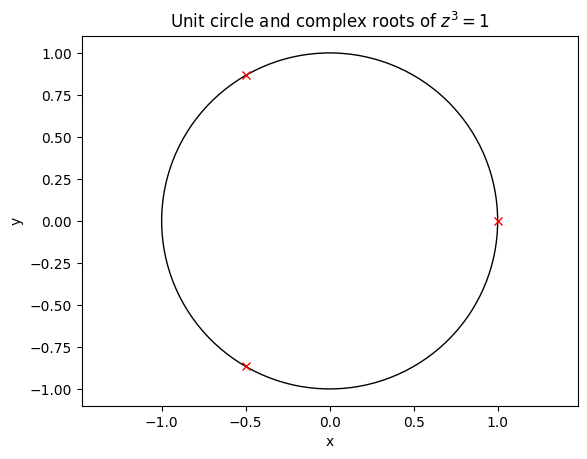

In [31]:
from matplotlib.patches import Circle

center = (0., 0.)
radius = 1
circle = Circle(center, radius , fill=False)
fig, ax = plt.subplots()
ax.add_patch(circle)
for i in range(3):
    ax.plot(Roots[i][0],Roots[i][1],'xr')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Unit circle and complex roots of $z^3=1$")
plt.axis('equal')
### END SOLUTION

### Question 9.
Let $\varphi(x)=x^3-1$.

On paper :

Express $y=\varphi(x)$ in the form $y=y_1+iy_2$ as a function of $x_1,x_2$ with $x=x_1+ix_2$.

We consider the function $\phi:R^2\rightarrow R^2$ which to $X=(x_1,x_2)^T$ associates $Y=(y_1,y_2)^T=\varphi(x_1+ix_2)$ .

Calculate the Jacobian matrix $Jphi(X)$ of $\phi(X)$.

In the following cell, program  functions $phi(X)$ and $Jphi(X)$, as you did for  $G_{test}$ and $JG_{test}$.

In [15]:
def phi(X):
    ### BEGIN SOLUTION
    return np.array([X[0]**3-3*X[1]**2*X[0]-1,-X[1]**3+3*X[0]**2*X[1]])
    ### END SOLUTION
    

In [16]:
def Jphi(X):
    ### BEGIN SOLUTION
    return np.array([[3*X[0]**2-3*X[1]**2,-6*X[1]*X[0]],        
                      [6*X[0]*X[1],-3*X[1]**2+3*X[0]**2]])
    ### END SOLUTION
   

### Question 10. 
Check that we can find the roots of the equation $x^3=1$ in $\mathbb{C}$ by calling the NewtonRalphson function with the functions $phi$ and $Jphi$ as third and fourth arguments, and different starting points $X0$. Print  these checks.


In [17]:
### BEGIN SOLUTION

eps=0.001
X0=[1,1]
Xstar,Gstar,nb_iter=NewtonRalphson(X0,eps,phi,Jphi)
print("results of Newton-Ralphson\nX_0={}\nX^*={}\nPhi({})={}\nNumber of iterations={}\n".format(
      X0,Xstar,Xstar,Gstar,nb_iter))
X0=[-1,1]
Xstar,Gstar,nb_iter=NewtonRalphson(X0,eps,phi,Jphi)
print("results of Newton-Ralphson\nX_0={}\nX^*={}\nPhi({})={}\nNumber of iterations={}\n".format(
      X0,Xstar,Xstar,Gstar,nb_iter))
X0=[-1,-1]
Xstar,Gstar,nb_iter=NewtonRalphson(X0,eps,phi,Jphi)
print("results of Newton-Ralphson\nX_0={}\nX^*={}\nPhi({})={}\nNumber of iterations={}\n".format(
      X0,Xstar,Xstar,Gstar,nb_iter))
### END SOLUTION


results of Newton-Ralphson
X_0=[1, 1]
X^*=[ 1.00013414e+00 -9.53221851e-05]
Phi([ 1.00013414e+00 -9.53221851e-05])=[ 0.00040246 -0.00028604]
Number of iterations=6

results of Newton-Ralphson
X_0=[-1, 1]
X^*=[-0.49999991  0.8660249 ]
Phi([-0.49999991  0.8660249 ])=[-1.43361306e-06  5.20673106e-07]
Number of iterations=4

results of Newton-Ralphson
X_0=[-1, -1]
X^*=[-0.49999991 -0.8660249 ]
Phi([-0.49999991 -0.8660249 ])=[-1.43361306e-06 -5.20673106e-07]
Number of iterations=4



### Question Bonus : 
Visualization of basins of attraction (To learn more about the nature of the boundary between basins of attraction:
(http://images.math.cnrs.fr/La-methode-de-Newton-et-son.html)):


We note $x^\star(x_0)\in \mathbb{C}$ the root to which Newton's algorithm converges from $x_0\in \mathbb{C}$. We discretize a zone encompassing the three roots and we assign a color code to each point in the zone, corresponding to the root towards which we converge with Newton starting from this point.

Program the following algorithm


Input: The function $\phi: \mathbb{R}^2\longrightarrow \mathbb{R}$, its Jacobian $J\phi~:\mathbb{R}^2\longrightarrow \mathbb{R}^{2x2}$, Array $r\in \mathbb{R}^{2\times 3}$,~ $\phi(r_{.,k})=0$, for $k=1,2,3$

Results: Figure representing the basins of attraction of the roots of $\phi$

Initialization: $N=5$, $h=1.5/N$ (we can increase $N$ once sure that the program is running)

Double loop $m=-N\nearrow N$, $n=-N\nearrow N$
<ul>
      <li>Calculate $x_{m,n}=x^*(mh+inh)$ the Newton Ralphson solution starting from mh+inh</li>
      <li>Calculate $C_{m,n}=argmin_{k=1,2,3} ||x_{m,n}-r_{.,k}||^2$</li> 
</ul>
     
Use the plt.imshow function to visualize the $C$ matrix (see example below)

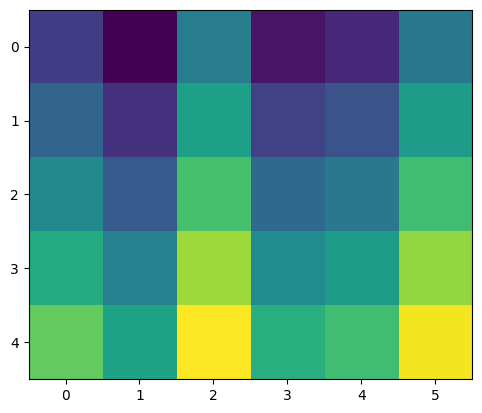

In [18]:
#exemple d'utilisation de imshow
import math
C=[]
for i in range(5):
    C.append([])
    for j in range(6):
        C[i].append(0.6*i+math.sin(4*j))       
plt.imshow(C)
plt.show()



To find the index of the smallest component of an array you can use the function numpy $where$ as in the exemple below

In [19]:
# the array Roots has been defined above
# we want to find which of the 3 roots is closer to a point X
X=np.array([-2,1])
# first we compute in p  the 3 distances of X to the roots
p=np.linalg.norm(Roots-X,axis=1) 
# we find the index of p corresponding to the smallest component
index=np.where(p==p.min())[0][0]
print("The closest root to X is root number ",index)


The closest root to X is root number  1


(-1.5, 1.5, -1.5, 1.5)

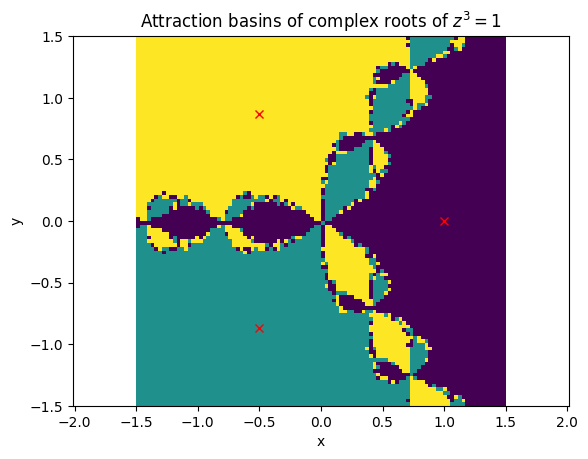

In [29]:
# Now try to combine all these ingredients to display the basins of attraction of the roots 
#
### BEGIN SOLUTION
Roots=np.array([[1,0],[-0.5,3**0.5/2],[-0.5,-3**0.5/2]])
eps=1.e-6
N=50
ext=1.5
h=1.5/N
C=[]
for m in range(-N,N):
    C.append([])   
    for n in range(-N,N):
        X0=[n*h,m*h]
        if m==0 and n==0:
            Xstar=np.array([0,0])
        else:
            Xstar,Gstar,nb_iter=NewtonRalphson(X0,eps,phi,Jphi)
        #print(X0,Xstar)
        p=np.linalg.norm(Roots-Xstar,axis=1)
        col=np.where(p==p.min())[0][0]
        C[m+N].append(col)
#print(C)
plt.imshow(C,extent=[-ext,ext,-ext,ext])
for r in range(3):
    plt.plot(Roots[r][0],Roots[r][1],"xr")
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Attraction basins of complex roots of $z^3=1$")
plt.axis('equal')
### END SOLUTION